# Prepare Dataset for Model Training and Evaluating

# Amazon Customer Reviews Dataset

https://s3.amazonaws.com/dsoaws/amazon-reviews-pds/readme.html

## Schema

- `marketplace`: 2-letter country code (in this case all "US").
- `customer_id`: Random identifier that can be used to aggregate reviews written by a single author.
- `review_id`: A unique ID for the review.
- `product_id`: The Amazon Standard Identification Number (ASIN).  `http://www.amazon.com/dp/<ASIN>` links to the product's detail page.
- `product_parent`: The parent of that ASIN.  Multiple ASINs (color or format variations of the same product) can roll up into a single parent.
- `product_title`: Title description of the product.
- `product_category`: Broad product category that can be used to group reviews (in this case digital videos).
- `star_rating`: The review's rating (1 to 5 stars).
- `helpful_votes`: Number of helpful votes for the review.
- `total_votes`: Number of total votes the review received.
- `vine`: Was the review written as part of the [Vine](https://www.amazon.com/gp/vine/help) program?
- `verified_purchase`: Was the review from a verified purchase?
- `review_headline`: The title of the review itself.
- `review_body`: The text of the review.
- `review_date`: The date the review was written.

# Checking Pre-Requisites from an earlier notebook

In [1]:
%store -r setup_dependencies_passed

In [2]:
try:
    setup_dependencies_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++")

In [3]:
print(setup_dependencies_passed)

True


In [4]:
%store -r setup_s3_bucket_passed

In [5]:
try:
    setup_s3_bucket_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++")

In [6]:
print(setup_s3_bucket_passed)

True


In [10]:
# setting it true by force
setup_iam_roles_passed = True
%store setup_iam_roles_passed

Stored 'setup_iam_roles_passed' (bool)


In [11]:
%store -r setup_iam_roles_passed

In [12]:
try:
    setup_iam_roles_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++")

In [13]:
print(setup_iam_roles_passed)

True


## Check if requirements passed

In [14]:
if not setup_dependencies_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_s3_bucket_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_iam_roles_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [15]:
import boto3
import sagemaker
import pandas as pd

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


## Download

Let's start by retrieving a subset of the Amazon Customer Reviews dataset.

In [16]:
# !aws s3 cp 's3://dsoaws/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz' ./data/

In [17]:
import csv

# df = pd.read_csv(
#     "./data/amazon_reviews_us_Digital_Software_v1_00.tsv.gz",
#     delimiter="\t",
#     quoting=csv.QUOTE_NONE,
#     compression="gzip",
# )
df = pd.read_csv(
    "./data/amazon_reviews_us_Digital_Software_v1_00.tsv.zip",
    delimiter="\t",
    quoting=csv.QUOTE_NONE,
    compression="zip",
)
df.shape

(102084, 15)

In [18]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,17747349,R2EI7QLPK4LF7U,B00U7LCE6A,106182406,CCleaner Free [Download],Digital_Software,4,0,0,N,Y,Four Stars,So far so good,2015-08-31
1,US,10956619,R1W5OMFK1Q3I3O,B00HRJMOM4,162269768,ResumeMaker Professional Deluxe 18,Digital_Software,3,0,0,N,Y,Three Stars,Needs a little more work.....,2015-08-31
2,US,13132245,RPZWSYWRP92GI,B00P31G9PQ,831433899,Amazon Drive Desktop [PC],Digital_Software,1,1,2,N,Y,One Star,Please cancel.,2015-08-31
3,US,35717248,R2WQWM04XHD9US,B00FGDEPDY,991059534,Norton Internet Security 1 User 3 Licenses,Digital_Software,5,0,0,N,Y,Works as Expected!,Works as Expected!,2015-08-31
4,US,17710652,R1WSPK2RA2PDEF,B00FZ0FK0U,574904556,SecureAnywhere Intermet Security Complete 5 De...,Digital_Software,4,1,2,N,Y,Great antivirus. Worthless customer support,I've had Webroot for a few years. It expired a...,2015-08-31


Text(0, 0.5, 'Review Count')

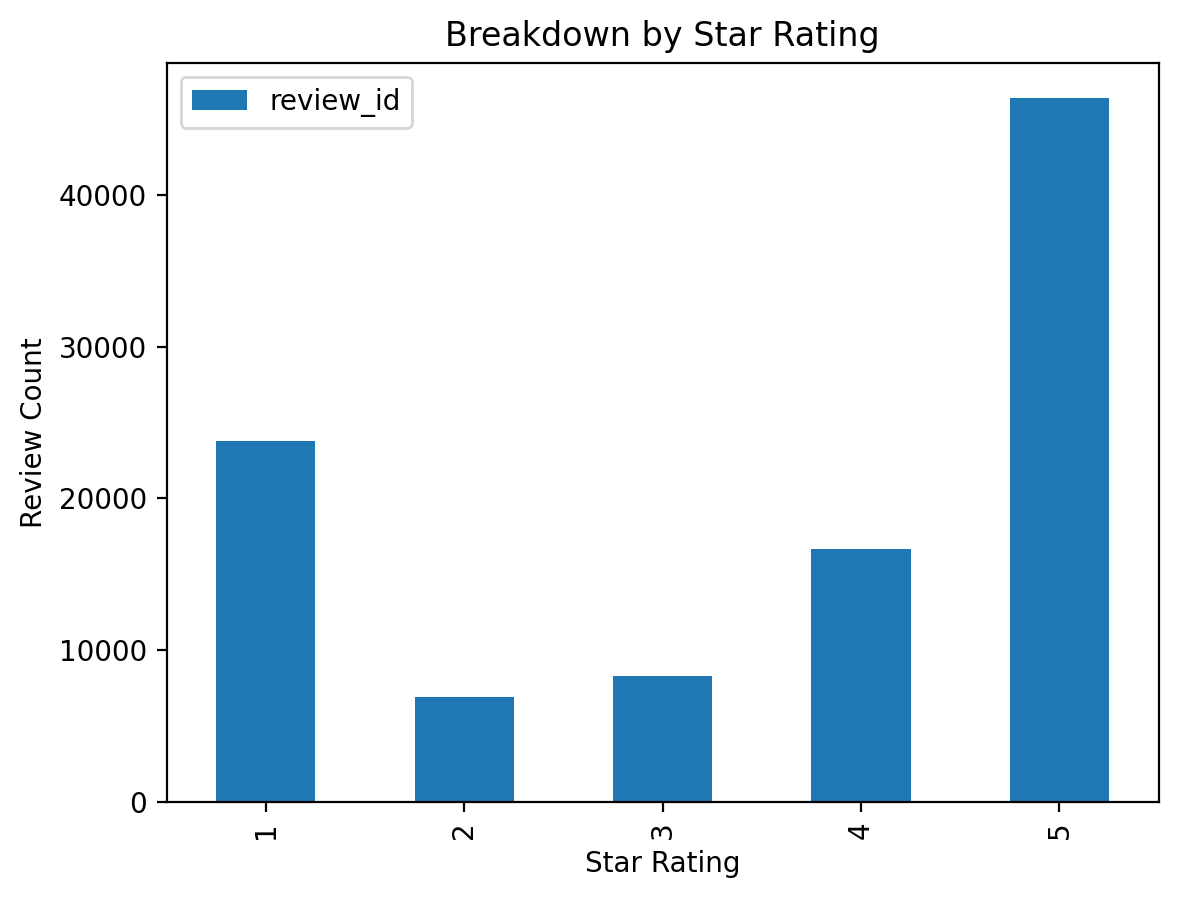

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

df[["star_rating", "review_id"]].groupby("star_rating").count().plot(kind="bar", title="Breakdown by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Review Count")

# Balance the Dataset

In [20]:
print("Shape of dataframe before splitting {}".format(df.shape))

Shape of dataframe before splitting (102084, 15)


In [21]:
# Balance the dataset down to the minority class
df_grouped_by = df.groupby(["star_rating"]) 
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))

df_balanced = df_balanced.reset_index(drop=True)
print("Shape of balanced dataframe {}".format(df_balanced.shape))

Shape of balanced dataframe (34450, 15)


## Memory Size

In [22]:
suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']
def humansize(nbytes):
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])


In [23]:
humansize(df_balanced.memory_usage(index=True, deep=True).sum())

'38.6 MB'

## Resample with smaller size

Reducing size to make training faster

In [24]:
df_balanced = df_balanced.sample(n=1000, replace=False, random_state=2024)

## Barchart

Text(0, 0.5, 'Review Count')

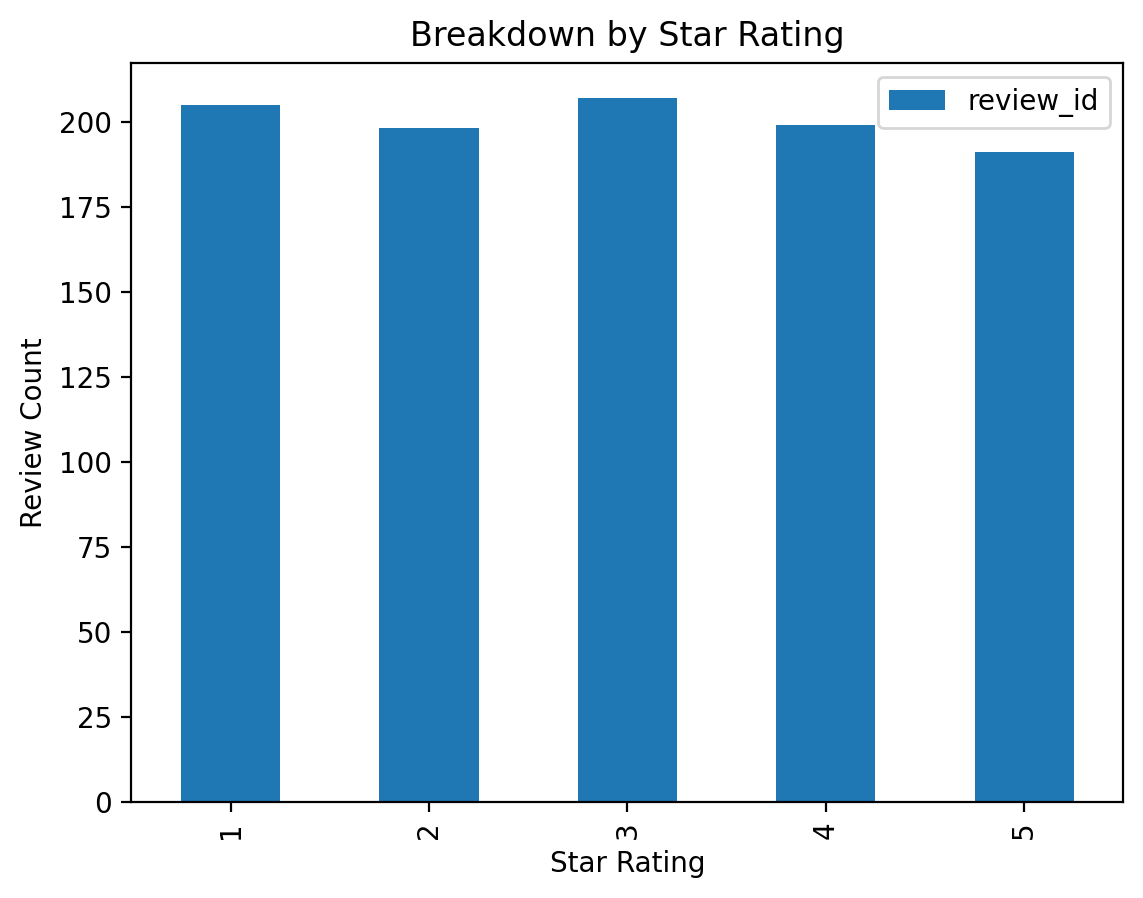

In [25]:
df_balanced[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="Breakdown by Star Rating"
)
plt.xlabel("Star Rating")
plt.ylabel("Review Count")

In [26]:
df_balanced.head(3)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
24670,US,26551854,R2KOV80IG7GEYN,B00MI40F5Q,773769026,"AVG Performance 2015, 30 day Trial [Download]",Digital_Software,4,0,1,N,Y,Enhaces somewhat...,"Enhances performance somewhat, but has REALLY ...",2015-06-06
16097,US,14100723,R1ASWNHNYZ4397,B00NG7JVSQ,811978073,TurboTax Deluxe Fed + Efile + State,Digital_Software,3,1,2,N,Y,TurboTax Mixed Bag,"Used TurboTax for the past several years, pret...",2015-03-07
29950,US,44808413,R3GIJ55WWO4VEE,B00FGDDTSQ,672725528,Norton 360 1 User 3 Licenses,Digital_Software,5,0,0,N,Y,Complete protection package,Easy to use complete package of security and u...,2014-02-05


# Split the Data into Train, Validation, and Test Sets

In [27]:
from sklearn.model_selection import train_test_split

# Split all data into 90% train and 10% holdout
df_train, df_holdout = train_test_split(df_balanced, test_size=0.10, stratify=df_balanced["star_rating"])

# Split holdout data into 50% validation and 50% test
df_validation, df_test = train_test_split(df_holdout, test_size=0.50, stratify=df_holdout["star_rating"])

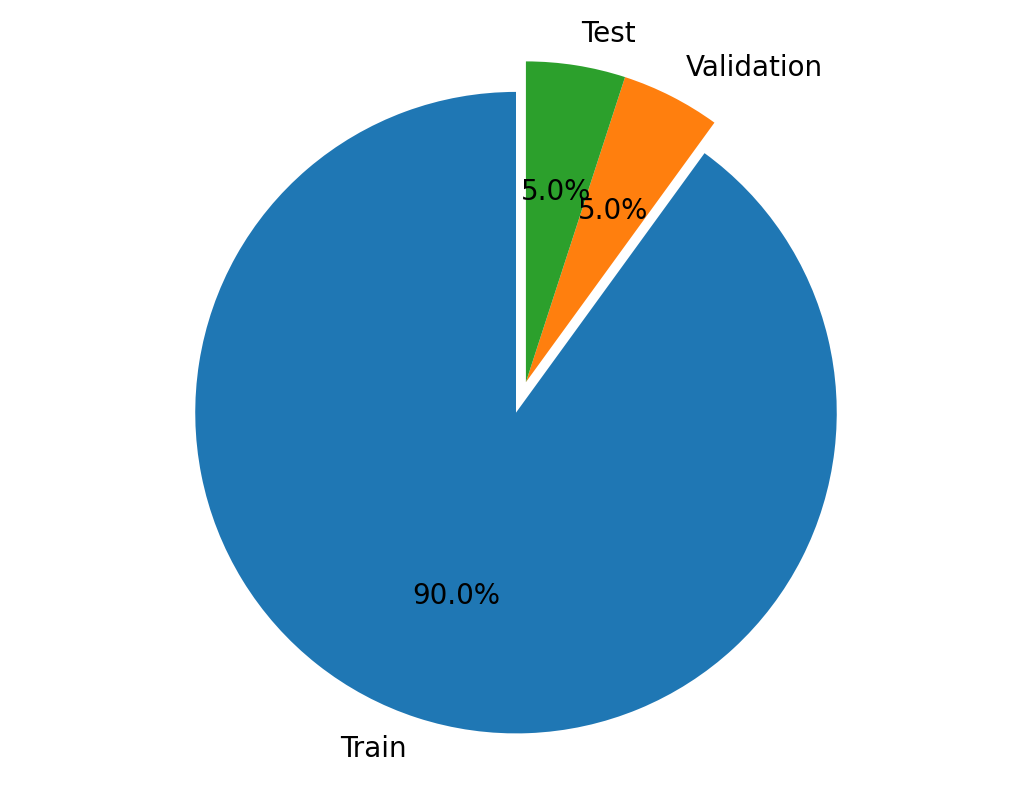

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["Train", "Validation", "Test"]
sizes = [len(df_train.index), len(df_validation.index), len(df_test.index)]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis("equal")

plt.show()

# Show 90% Train Data Split

In [29]:
# at least needs to be 500
df_train.shape

(900, 15)

<Axes: title={'center': '90% Train Breakdown by Star Rating'}, xlabel='star_rating'>

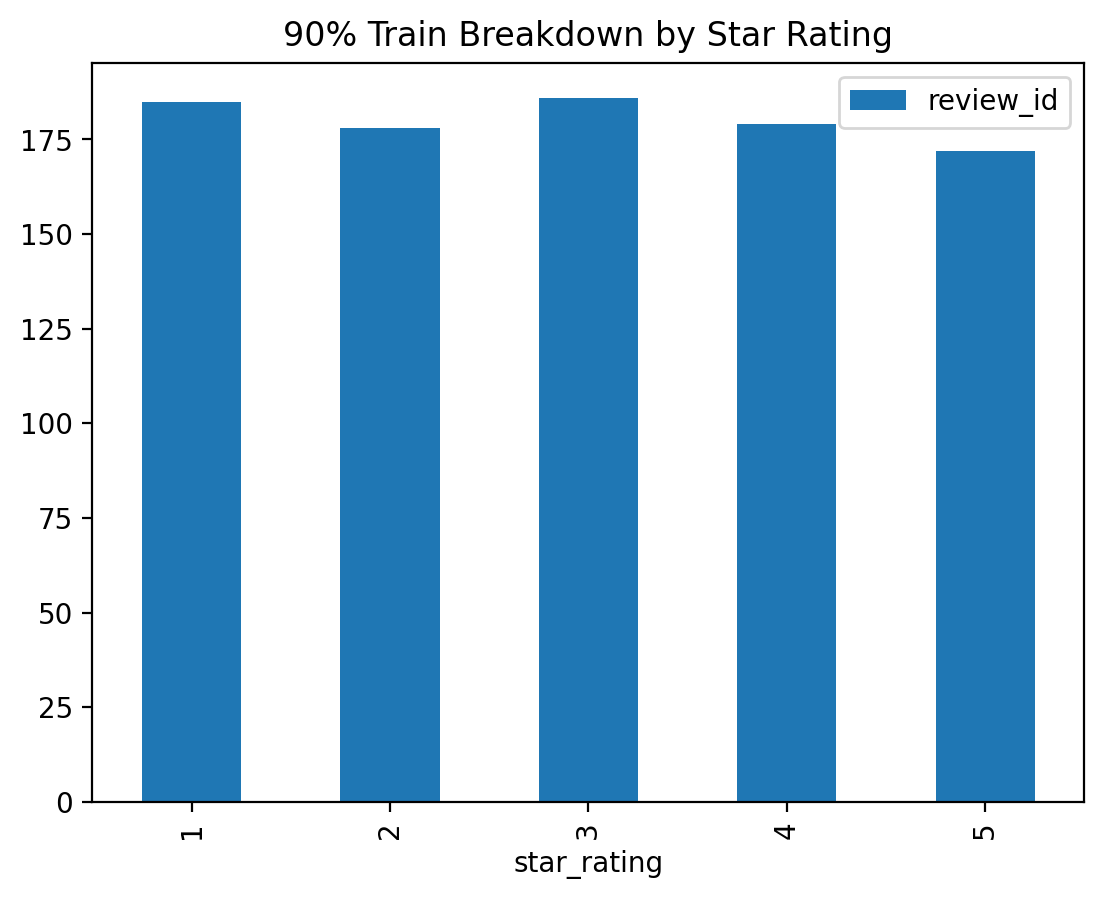

In [30]:
df_train[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="90% Train Breakdown by Star Rating"
)

# Show 5% Validation Data Split

In [31]:
df_validation.shape

(50, 15)

<Axes: title={'center': '5% Validation Breakdown by Star Rating'}, xlabel='star_rating'>

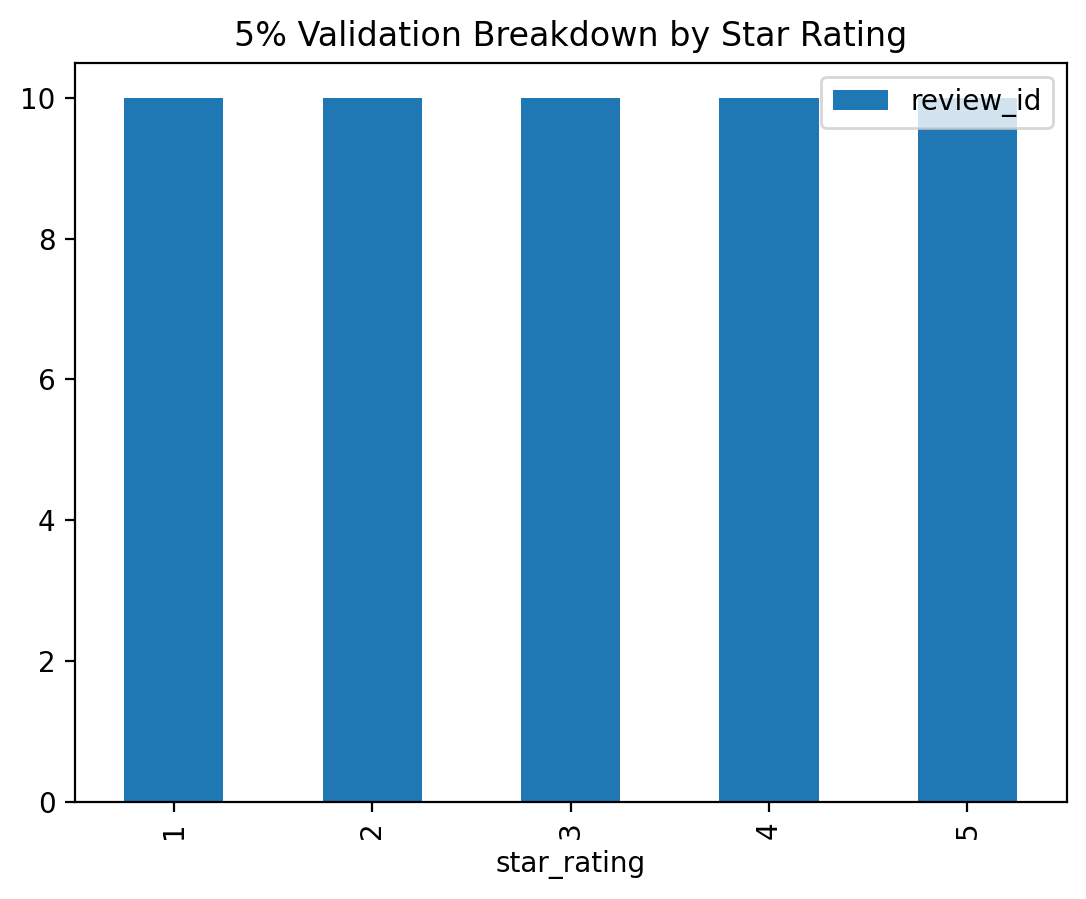

In [32]:
df_validation[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="5% Validation Breakdown by Star Rating"
)

# Show 5% Test Data Split

In [33]:
df_test.shape

(50, 15)

<Axes: title={'center': '5% Test Breakdown by Star Rating'}, xlabel='star_rating'>

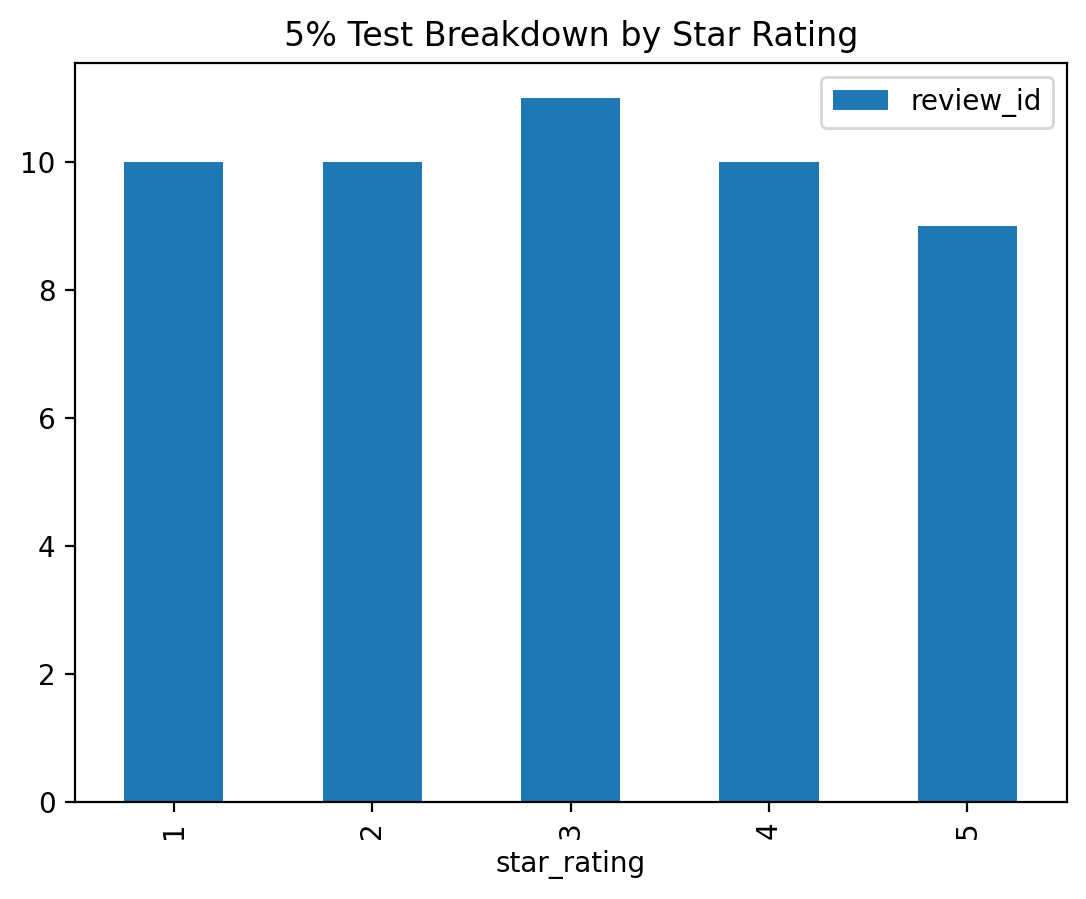

In [34]:
df_test[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="5% Test Breakdown by Star Rating"
)

# Select `star_rating` and `review_body` for Training

In [35]:
df_train = df_train[["star_rating", "review_body"]]
df_train.shape

(900, 2)

In [36]:
df_train.head(5)

,star_rating,review_body
171,1,Download did not go as well as it did last yea...
19296,3,"I had no trouble setting up this new version, ..."
3274,1,Shortly after loading and using this product I...
11707,2,I always ask for Turbo Tax for Christmas and t...
18605,3,I recently upgraded from Quicken Deluxe 2010 b...


# Write a Train CSV with Header for Autopilot 

In [37]:
autopilot_train_path = "./amazon_reviews_us_Digital_Software_v1_00_autopilot.csv"
df_train.to_csv(autopilot_train_path, index=False, header=True)

# Upload Train Data to S3 for Autopilot

In [38]:
train_s3_prefix = "data"
autopilot_train_s3_uri = sess.upload_data(path=autopilot_train_path, key_prefix=train_s3_prefix)
autopilot_train_s3_uri

's3://sagemaker-us-east-1-276004173387/data/amazon_reviews_us_Digital_Software_v1_00_autopilot.csv'

In [39]:
!aws s3 ls $autopilot_train_s3_uri

2024-09-16 20:48:40     362979 amazon_reviews_us_Digital_Software_v1_00_autopilot.csv


# Store Variables for Next Notebook(s)

In [40]:
%store autopilot_train_s3_uri

Stored 'autopilot_train_s3_uri' (str)


In [41]:
%store

Stored variables and their in-db values:
autopilot_train_s3_uri                -> 's3://sagemaker-us-east-1-276004173387/data/amazon
comprehend_train_s3_uri               -> 's3://sagemaker-us-east-1-276004173387/data/amazon
forecast_project_name                 -> 'util_power_forecast'
setup_dependencies_passed             -> True
setup_iam_roles_passed                -> True
setup_s3_bucket_passed                -> True


# Release Resources

In [42]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [43]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}

<IPython.core.display.Javascript object>